In [4]:
# We have the same setup as DJ
# a black-box function f:{0,1}^n -> {0,1}
# Now, assume f is linear
# $ f(x) \equiv s\cdot x (mod 2) $ for some string s
# BV finds s
#
# Note: in the previous section, the extra NOT gates
# added to the balanced oracle make the function 
# take the form $ f(x) = s\cdot x + b $ 
# where b is 101 given by the NOT gates
# s = 111 was the output qubit, given by the CNOT gates

# 1. Initialize input qubits to 0 and output qubit to 1
# 2. Apply left H-wall
# 3. Oracle
# 4. Right H-wall
# 5. Measure the input qubits (not the output qubit)



In [5]:
# import 
import matplotlib.pyplot as plt
import numpy as np

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile, assemble, execute

from qiskit.visualization import plot_histogram


In [6]:
# This string can be altered to any binary string 
#   of length up to 24 bits
#   qiskit returns an error for any larger
s = '11111111000000111111111'

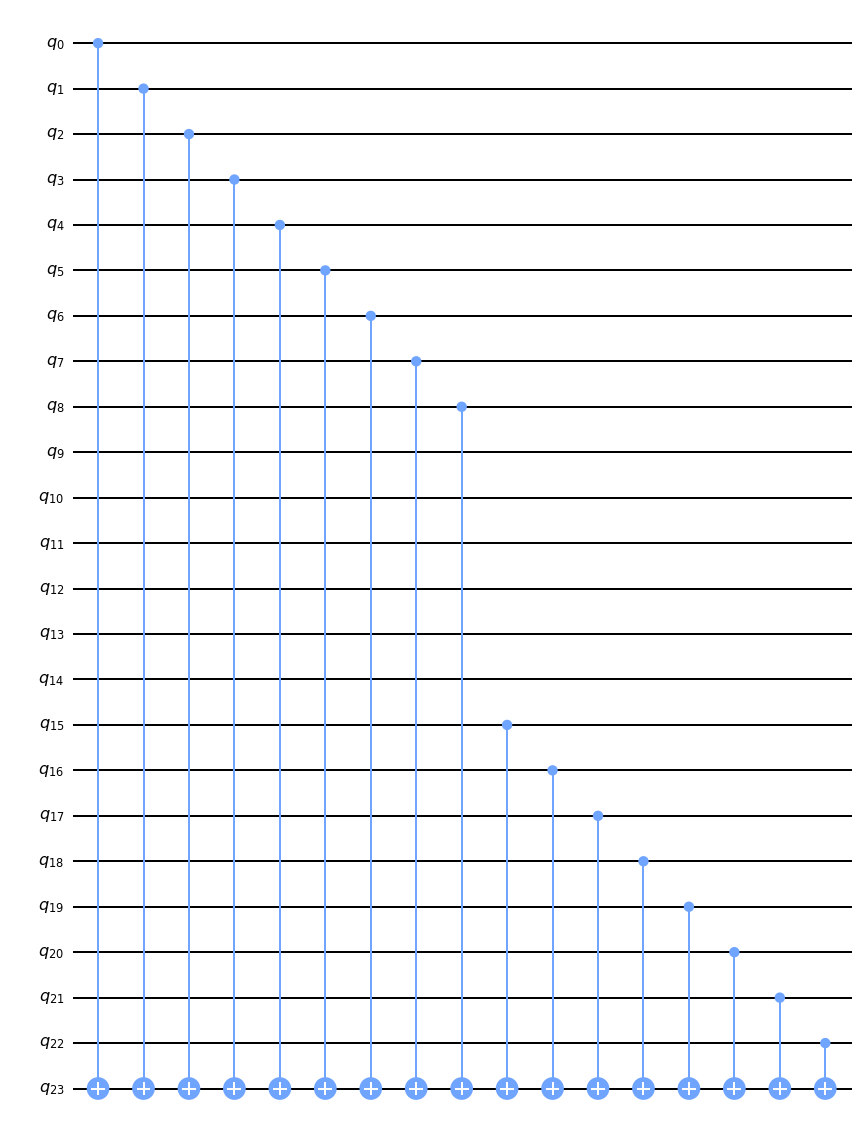

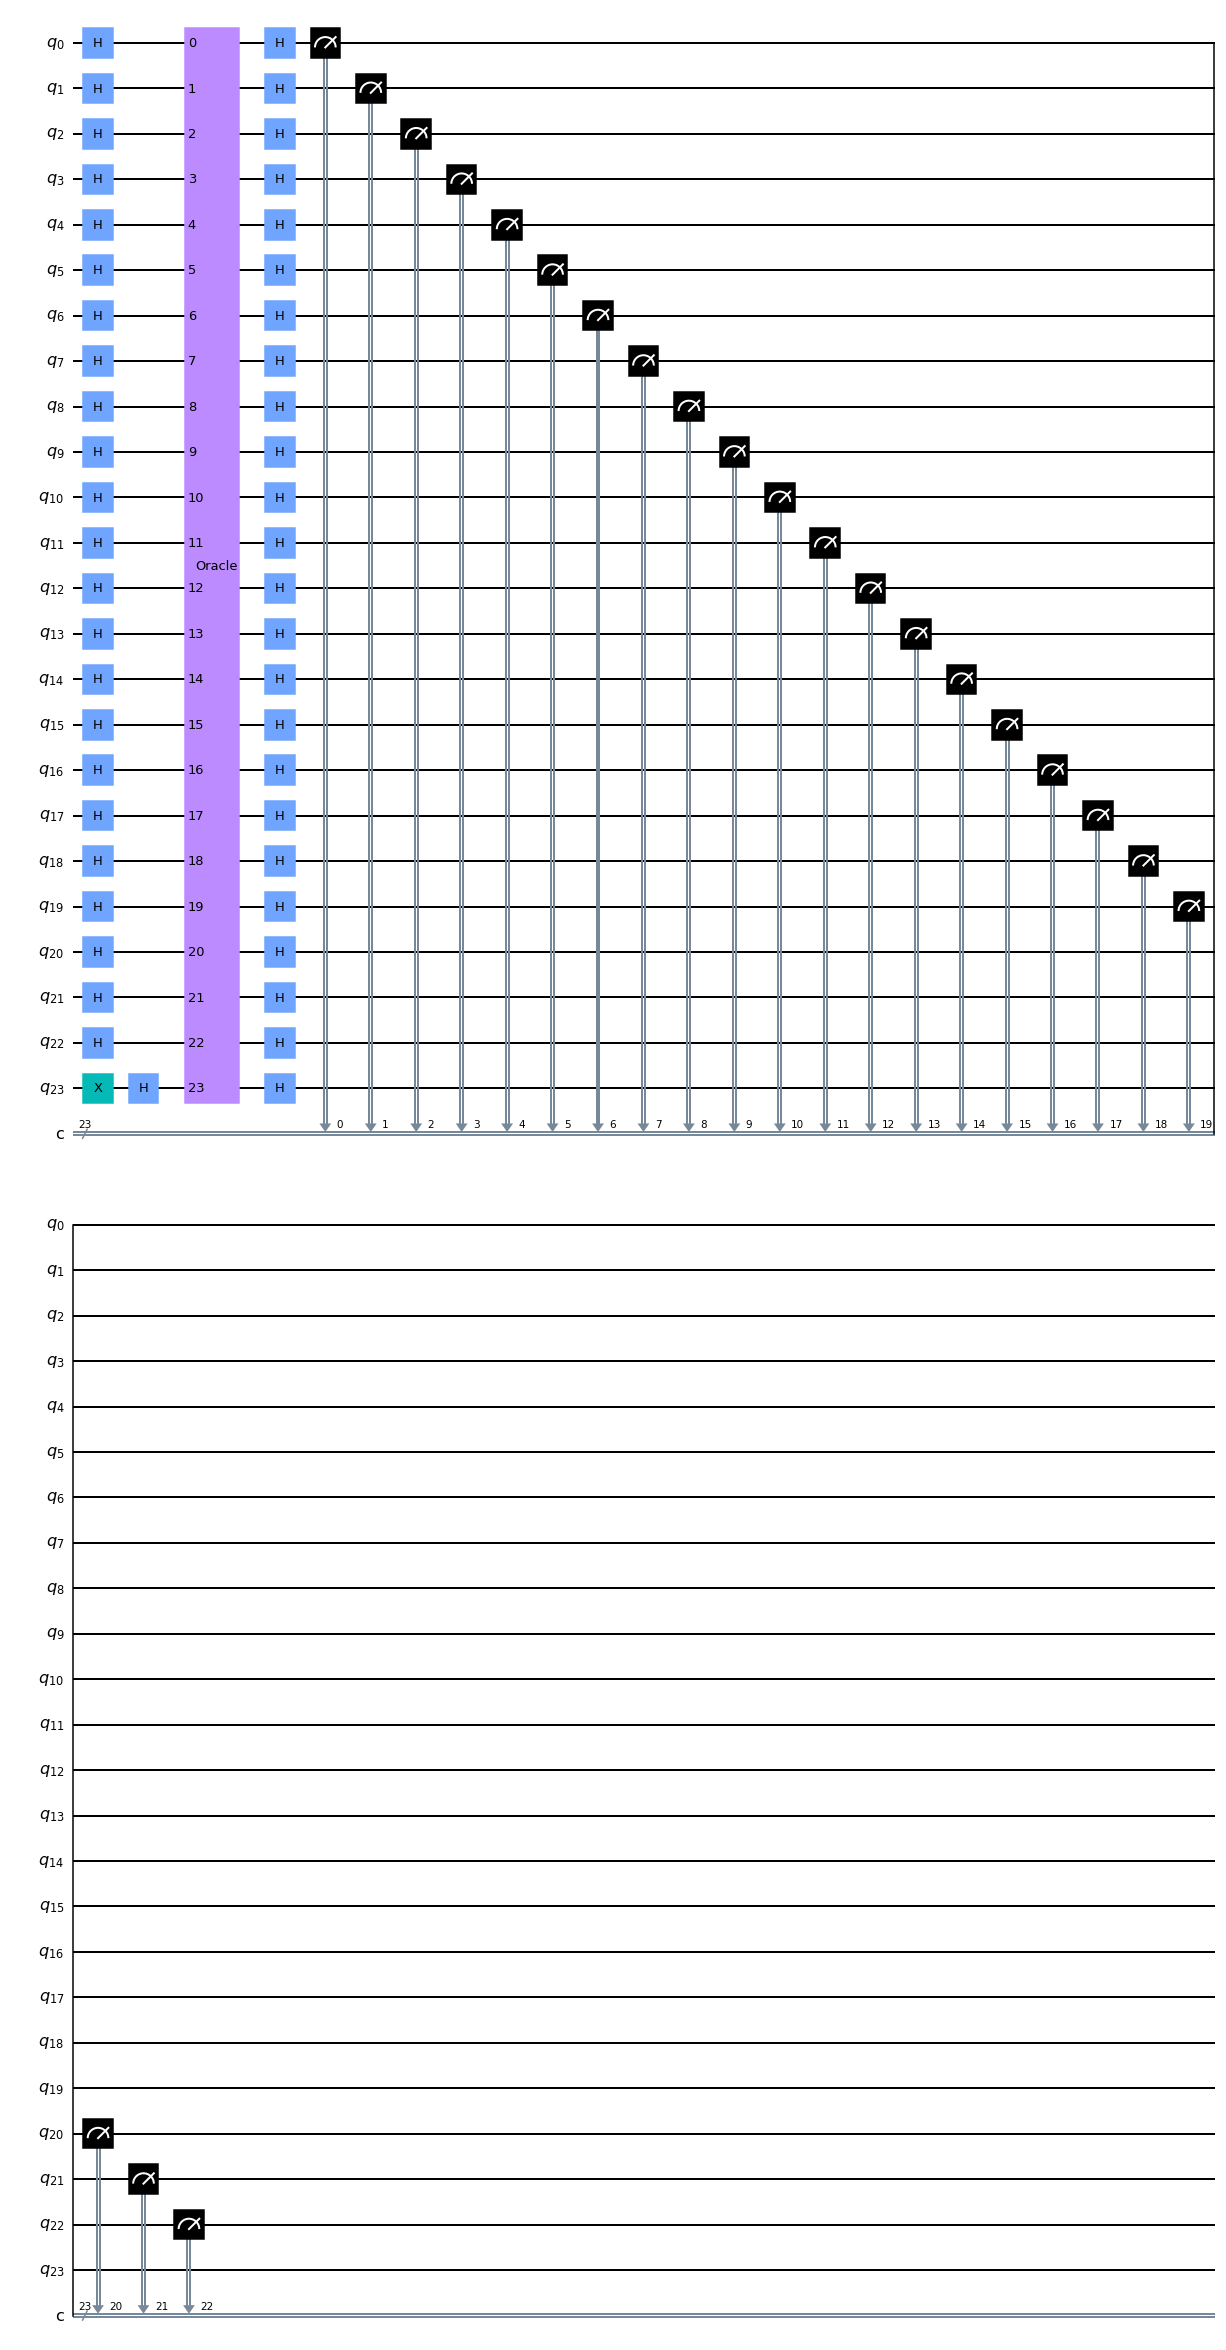

In [7]:
# create a circuit with n + 1 qubits: 
#       one for each bit in the string s
#       one single auxiliary qubit
# we want to measure only the n input qubits,
#       not the auxiliary qubit
# quantum registers = n + 1
# classical regs = n

n = len(s)
bv_circuit = QuantumCircuit(n+1, n)

# put auxiliary qubit in state 1
#       so that after H-wall it becomes (-)
bv_circuit.x(n)

# Left wall of Hadamard gates
for i in range(n+1):
    bv_circuit.h(i)


# Oracle
o_circuit = QuantumCircuit(n+1)
w = s[::-1] # reverse s for qiskit's ordering
for q in range(n):
    if w[q] == '1':
        o_circuit.cx(q,n)
oracle = o_circuit.to_gate()
oracle.name = "Oracle"
bv_circuit.append(oracle, range(n+1))

# Right H-wall
for i in range(n+1):
    bv_circuit.h(i)

# Measure onto the classical bits
for i in range(n):
    bv_circuit.measure(i,i)

display(o_circuit.draw(output='mpl'))
display(bv_circuit.draw(output='mpl'))

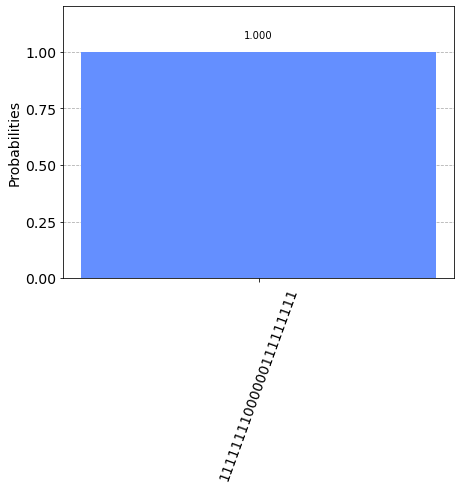

In [8]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
result = execute(bv_circuit, backend=backend, shots=shots).result()
answer = result.get_counts()

plot_histogram(answer)
